In [1]:
import csv
import pandas as pd
import numpy as np
import warnings
import llvmlite




warnings.filterwarnings('ignore')


x = "MoH_Vote_AllDonors_Data_Long_Sorted_CLEAN_New.csv"
df = pd.read_csv(x)
df.head(50)



,person,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,ethnicity_asian,ethnicity_black,...,ethnicity_native,ethnicity_white,party_short_D,party_short_R,MODELING_GROUP,Bloomberg_Donations_Diff,Citadel_Donations_Diff,Year_2012,Year_2014,Year_2016
0,0,0.750000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,1,0,1,TESTING,0.0,0.0,1,0,0
1,0,0.666667,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,1,0,1,TESTING,0.0,0.0,0,1,0
2,0,0.800000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,1,0,1,TESTING,0.0,0.0,0,0,1
3,1,0.750000,0.833333,0.666667,0.714286,0.333333,1,0,0,0,...,0,1,0,1,TRAINING,0.0,0.0,1,0,0
4,1,1.000000,0.800000,0.333333,0.600000,0.750000,1,0,0,0,...,0,1,0,1,TRAINING,0.0,0.0,0,1,0
5,1,0.600000,0.857143,0.777778,1.000000,1.000000,1,0,0,0,...,0,1,0,1,TRAINING,0.0,0.0,0,0,1
6,2,0.600000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,1,0,1,TRAINING,0.0,0.0,0,0,1
7,2,0.500000,0.833333,0.333333,0.714286,0.666667,0,1,0,0,...,0,1,0,1,TRAINING,0.0,0.0,1,0,0
8,2,1.000000,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,1,0,1,TRAINING,0.0,0.0,0,1,0
9,3,0.750000,0.833333,0.666667,0.714286,0.666667,0,1,0,0,...,0,1,0,1,TRAINING,0.0,0.0,1,0,0


In [2]:
df = df.drop('MODELING_GROUP', 1)
df.head()

,person,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,ethnicity_asian,ethnicity_black,...,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,Bloomberg_Donations_Diff,Citadel_Donations_Diff,Year_2012,Year_2014,Year_2016
0,0,0.750000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,1,0,1,0.0,0.0,1,0,0
1,0,0.666667,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,0,1,0,1,0.0,0.0,0,1,0
2,0,0.800000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,0,1,0,1,0.0,0.0,0,0,1
3,1,0.750000,0.833333,0.666667,0.714286,0.333333,1,0,0,0,...,0,0,1,0,1,0.0,0.0,1,0,0
4,1,1.000000,0.800000,0.333333,0.600000,0.750000,1,0,0,0,...,0,0,1,0,1,0.0,0.0,0,1,0


In [3]:
df_trial = df[['VoteAlongRatio_Film','VoteAlongRatio_FS_IIR','VoteAlongRatio_FS_FSS','VoteAlongRatio_FS_CM','VoteAlongRatio_FS_REB']]
df_trial.head()

df_trial['avg'] = df_trial.mean(axis=1)
df_trial.head()

df['avg'] = df_trial['avg']
df.head(100)








,person,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,ethnicity_asian,ethnicity_black,...,ethnicity_native,ethnicity_white,party_short_D,party_short_R,Bloomberg_Donations_Diff,Citadel_Donations_Diff,Year_2012,Year_2014,Year_2016,avg
0,0,0.750000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,1,0,1,0.0,0.0,1,0,0,0.150000
1,0,0.666667,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,1,0,1,0.0,0.0,0,1,0,0.630000
2,0,0.800000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,1,0,1,0.0,0.0,0,0,1,0.909206
3,1,0.750000,0.833333,0.666667,0.714286,0.333333,1,0,0,0,...,0,1,0,1,0.0,0.0,1,0,0,0.659524
4,1,1.000000,0.800000,0.333333,0.600000,0.750000,1,0,0,0,...,0,1,0,1,0.0,0.0,0,1,0,0.696667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,0.800000,0.285714,0.444444,0.000000,0.000000,1,0,0,0,...,0,1,1,0,396.0,396.0,0,0,1,0.306032
96,32,0.250000,0.333333,0.333333,0.285714,0.666667,1,0,1,0,...,0,0,1,0,0.0,0.0,1,0,0,0.373810
97,32,0.333333,0.800000,0.333333,0.400000,0.250000,1,0,1,0,...,0,0,1,0,0.0,0.0,0,1,0,0.423333
98,32,0.600000,0.285714,0.333333,0.000000,0.000000,1,0,1,0,...,0,0,1,0,0.0,0.0,0,0,1,0.243810


In [4]:
treatment = ['avg']
covariates = [
 'Year_2012',
 'Year_2014',
 'Year_2016',
 'sex_female',
 'sex_male',
 'ethnicity_asian',
 'ethnicity_black',
 'ethnicity_hispanic',
 'ethnicity_islander',
 'ethnicity_native',
 'ethnicity_white',
 'party_short_D',
 'party_short_R']

outcome = ['Bloomberg_Donations_Diff']


In [5]:


all_bloom = treatment+outcome+covariates

dfbloom = df.dropna(axis=0, subset=all_bloom)





In [6]:
# Split Data into Train and Test Sets


#create a list of all unique IDs
ids=dfbloom
bloom_id=ids.drop_duplicates(subset='person')
bloom_id=bloom_id[['person']]
bloom_id.shape

#create new variable with random number between one and zero
np.random.seed(42)
bloom_id['data_use'] = (np.random.randint(0, 10000, bloom_id.shape[0]))/10000
bloom_id=bloom_id[['person', 'data_use']]

#assign each person to a modeling group training or testing with a 50 percent chance 

bloom_id['MODELING_GROUP'] = np.where(((bloom_id.data_use <= 0.50)), 'TRAINING', 'TESTING')


groups_bloom = bloom_id.groupby(['MODELING_GROUP'])['person'].count()
groups_bloom

dfbloom=dfbloom.sort_values(by=['person'], ascending=[True])
bloom_id=bloom_id.sort_values(by=['person'], ascending=[True])
dfbloom =dfbloom.merge(bloom_id, on=['person'], how='inner')
dfbloom.head(50)

,person,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,ethnicity_asian,ethnicity_black,...,party_short_D,party_short_R,Bloomberg_Donations_Diff,Citadel_Donations_Diff,Year_2012,Year_2014,Year_2016,avg,data_use,MODELING_GROUP
0,0,0.750000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,1,0.0,0.0,1,0,0,0.150000,0.7270,TESTING
1,0,0.666667,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,1,0.0,0.0,0,1,0,0.630000,0.7270,TESTING
2,0,0.800000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,1,0.0,0.0,0,0,1,0.909206,0.7270,TESTING
3,1,0.750000,0.833333,0.666667,0.714286,0.333333,1,0,0,0,...,0,1,0.0,0.0,1,0,0,0.659524,0.0860,TRAINING
4,1,1.000000,0.800000,0.333333,0.600000,0.750000,1,0,0,0,...,0,1,0.0,0.0,0,1,0,0.696667,0.0860,TRAINING
5,1,0.600000,0.857143,0.777778,1.000000,1.000000,1,0,0,0,...,0,1,0.0,0.0,0,0,1,0.846984,0.0860,TRAINING
6,2,0.600000,0.857143,0.888889,1.000000,1.000000,0,1,0,0,...,0,1,0.0,0.0,0,0,1,0.869206,0.5390,TESTING
7,2,0.500000,0.833333,0.333333,0.714286,0.666667,0,1,0,0,...,0,1,0.0,0.0,1,0,0,0.609524,0.5390,TESTING
8,2,1.000000,0.800000,0.333333,0.600000,0.750000,0,1,0,0,...,0,1,0.0,0.0,0,1,0,0.696667,0.5390,TESTING
9,3,0.750000,0.833333,0.666667,0.714286,0.666667,0,1,0,0,...,0,1,0.0,0.0,1,0,0,0.726190,0.5191,TESTING


In [7]:
test_bloom=dfbloom.loc[dfbloom['MODELING_GROUP']=='TESTING']
train_bloom=dfbloom.loc[dfbloom['MODELING_GROUP']=='TRAINING']

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train_bloom[outcome]
T = train_bloom[treatment]
X = train_bloom[covariates]
W = None
X_test_bloom = test_bloom[covariates]

In [8]:
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV

 
causal_forest_bloom = CausalForestDML(criterion='het', 
                                n_estimators=1000,       
                                min_samples_leaf=10, 
                                max_depth=3, 
                                max_samples=0.4,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=MultiTaskLassoCV(), 
                                model_y=MultiTaskLassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest_bloom.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest_bloom.const_marginal_ate(X_test_bloom)

array([[272.06486659]])

In [9]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest_bloom.effect(X)
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest_bloom.effect_interval(X, alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

# merge dataframes and sort 
df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df.sort_values('cate', inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = df.rolling(window=30, center=True).mean()

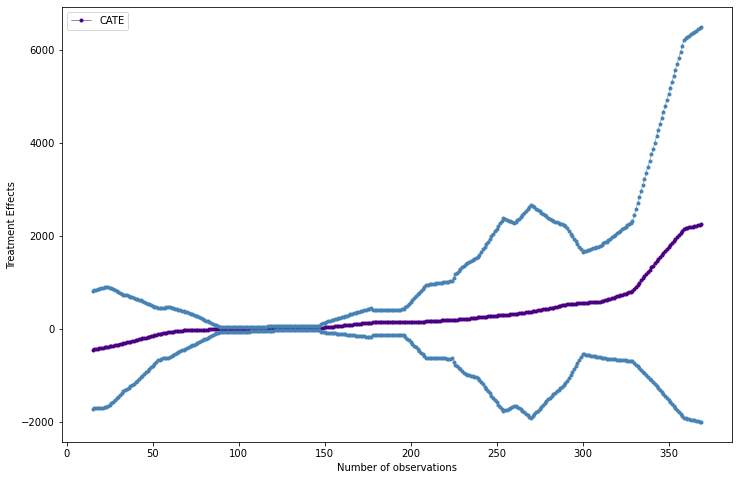

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

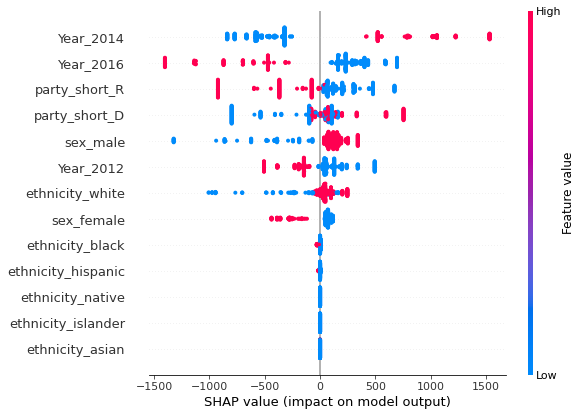

In [11]:
import shap
from econml.dml import CausalForestDML

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train_bloom[outcome]
T = train_bloom[treatment]
X = train_bloom[covariates]
W = None


# fit causal forest with default parameters 
causal_forest = CausalForestDML()
causal_forest.fit(Y, T, X=X, W=W)

# calculate shap values of causal forest model
shap_values = causal_forest.shap_values(X)
# plot shap values 
shap.summary_plot(shap_values['Y0']['T0'])

In [12]:
causal_forest.effect_inference(X_test_bloom[:10]).summary_frame(alpha=0.1, value=0, decimals=3)

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
0,15.929,8.892,1.791,0.073,1.302,30.555
1,8.843,11.806,0.749,0.454,-10.576,28.262
2,1.541,16.895,0.091,0.927,-26.249,29.331
3,1.541,16.895,0.091,0.927,-26.249,29.331
4,15.929,8.892,1.791,0.073,1.302,30.555
5,8.843,11.806,0.749,0.454,-10.576,28.262
6,15.929,8.892,1.791,0.073,1.302,30.555
7,8.843,11.806,0.749,0.454,-10.576,28.262
8,1.541,16.895,0.091,0.927,-26.249,29.331
